In [0]:
import numpy as np
import matplotlib.patches as mpatches
import cv2
import skimage
from skimage import io,morphology,future
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.color import label2rgb
import math

In [0]:
from google.colab import drive
drive.mount('/content/drive')
#4/RwEp_GB8-piK_gxowM6kjNU0tAoI087r_yWJP_5zENzUG6cmxaqBMgI

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


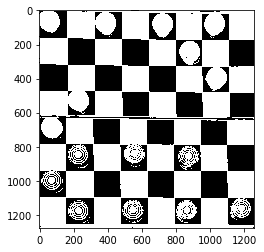

In [0]:
img_path = 'drive/My Drive/Img pro/New Doc 2019-06-06 02.28.29_31.jpg'
im_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.ADAPTIVE_THRESH_GAUSSIAN_C )
im_bw = ~im_bw
plt.imshow(im_bw, cmap='gray')

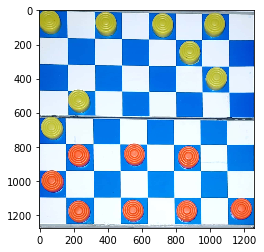

In [0]:
plt.imshow( skimage.io.imread(img_path))

In [0]:
new_im  = skimage.morphology.binary_opening(im_bw,skimage.morphology.disk(10))

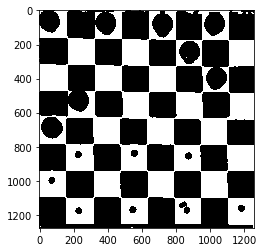

In [0]:
plt.imshow(~new_im, cmap='gray')

In [0]:
label_image = skimage.morphology.label(~new_im)

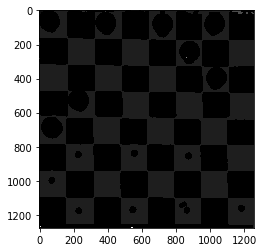

In [0]:
plt.imshow(label_image, cmap='gray')

In [0]:
max = 0
board = None
regions = regionprops(label_image)
print(len(regions))
for region in regions:
  if (max < region.area):
    max = region.area
    board = region

17


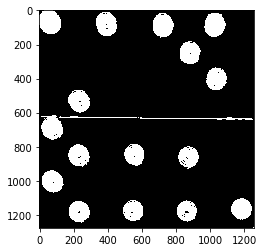

In [0]:
img = cv2.imread(img_path)
onlymark = img[:,:,0]
(thresh, onlymark_im_bw) = cv2.threshold(onlymark, 128, 255, cv2.THRESH_BINARY | cv2.ADAPTIVE_THRESH_GAUSSIAN_C )
plt.imshow(onlymark_im_bw,cmap='gray')

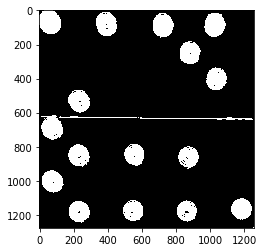

In [0]:
r0, c0, r1, c1 = board.bbox
board_r = r1
board_c = c1
only_board = onlymark_im_bw[r0:r1, c0:c1]
plt.imshow(only_board,cmap='gray')

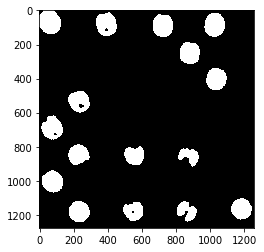

In [0]:
new_im_only_board  = skimage.morphology.binary_opening(only_board,skimage.morphology.disk(10))
new_im_only_board  = skimage.morphology.binary_closing(new_im_only_board,skimage.morphology.disk(5))
plt.imshow(new_im_only_board,cmap='gray')

In [0]:
label_only_board = skimage.morphology.label(new_im_only_board)

In [0]:
marks = []
regions = regionprops(label_only_board)
print(len(regions))
for region in regions:
    cir = (4*math.pi*region.area)/(math.pow(region.perimeter, 2))
    if(cir > 0.45): 
      print("circle ",cir)
      print("circle ",region.perimeter," ",region.area)
      marks.append(region)
    else: 
      print("squ ",cir)
      print("squ ",region.perimeter," ",region.area)

16
circle  0.8840794365425774
circle  459.9898987322333   14886
circle  0.6545785405017299
circle  504.9015869776647   13279
circle  0.8847592078189227
circle  440.3746750430835   13654
circle  0.8686606703741322
circle  435.06096654409873   13084
circle  0.8681045277112165
circle  430.2325394193526   12787
circle  0.8703955831357693
circle  422.9604614807104   12391
circle  0.5356464427262796
circle  527.7716446627535   11873
circle  0.6301329558540095
circle  504.8010819142763   12778
circle  0.8311349360147967
circle  412.13203435596427   11234
circle  0.7954815349013337
circle  402.43354954612926   10252
circle  0.5134976258558376
circle  440.8599564173221   7942
circle  0.8771639453282915
circle  424.3746750430836   12571
circle  0.8773257092298948
circle  409.5462479183374   11710
circle  0.9009801336482939
circle  412.2325394193526   12184
squ  0.43266946945398754
squ  502.5584412271571   8696
circle  0.631797661243174
circle  449.445742854949   10156


In [0]:
rstep = board_r/8
cstep = board_c/8
w, h = 8, 8;
board = [[0 for x in range(w)] for y in range(h)] 
for mark in marks:
  m_r ,m_c = mark.centroid
  r = int(round(m_r/rstep))
  c = int(round(m_c/cstep))
  if r>7 : r=7
  if c>7 : c = 7
  board[r][c] = 1

In [0]:
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in board]))

   1   0   0   0   0   0   0   0
   0   0   0   1   0   1   0   1
   0   0   0   0   0   0   1   0
   0   1   0   0   0   0   0   1
   1   0   0   0   0   0   0   0
   0   1   0   0   1   0   1   0
   0   1   0   0   0   0   0   0
   0   1   0   0   1   0   0   1
